# Photometric Error Analysis

In this notebook, we assess the error in our measurements of NUV magnitudes, as based on the GALEX catalog for this region.

## Import modules

In [1]:
# Standard
import numpy as np
import matplotlib.pyplot as plt

# Auxillary
import smc
from scipy import stats

%config InlineBackend.figure_format = "retina"
%matplotlib inline

## Foreground-corrected photometry matched to GALEX catalog

In [134]:
# Photometry
catalog_comparison = np.genfromtxt('../data/photometered_galex_catalog_comparison_field', dtype = None, names = True)

# photometered_galex_catalog_comparison_field
ra, dec, photometered_nuv, galex_nuv = \
catalog_comparison['ra'], catalog_comparison['dec'], \
catalog_comparison['nuv'] - 18.7 - 0.42, catalog_comparison['galex_nuv'] - 18.7 - 0.42

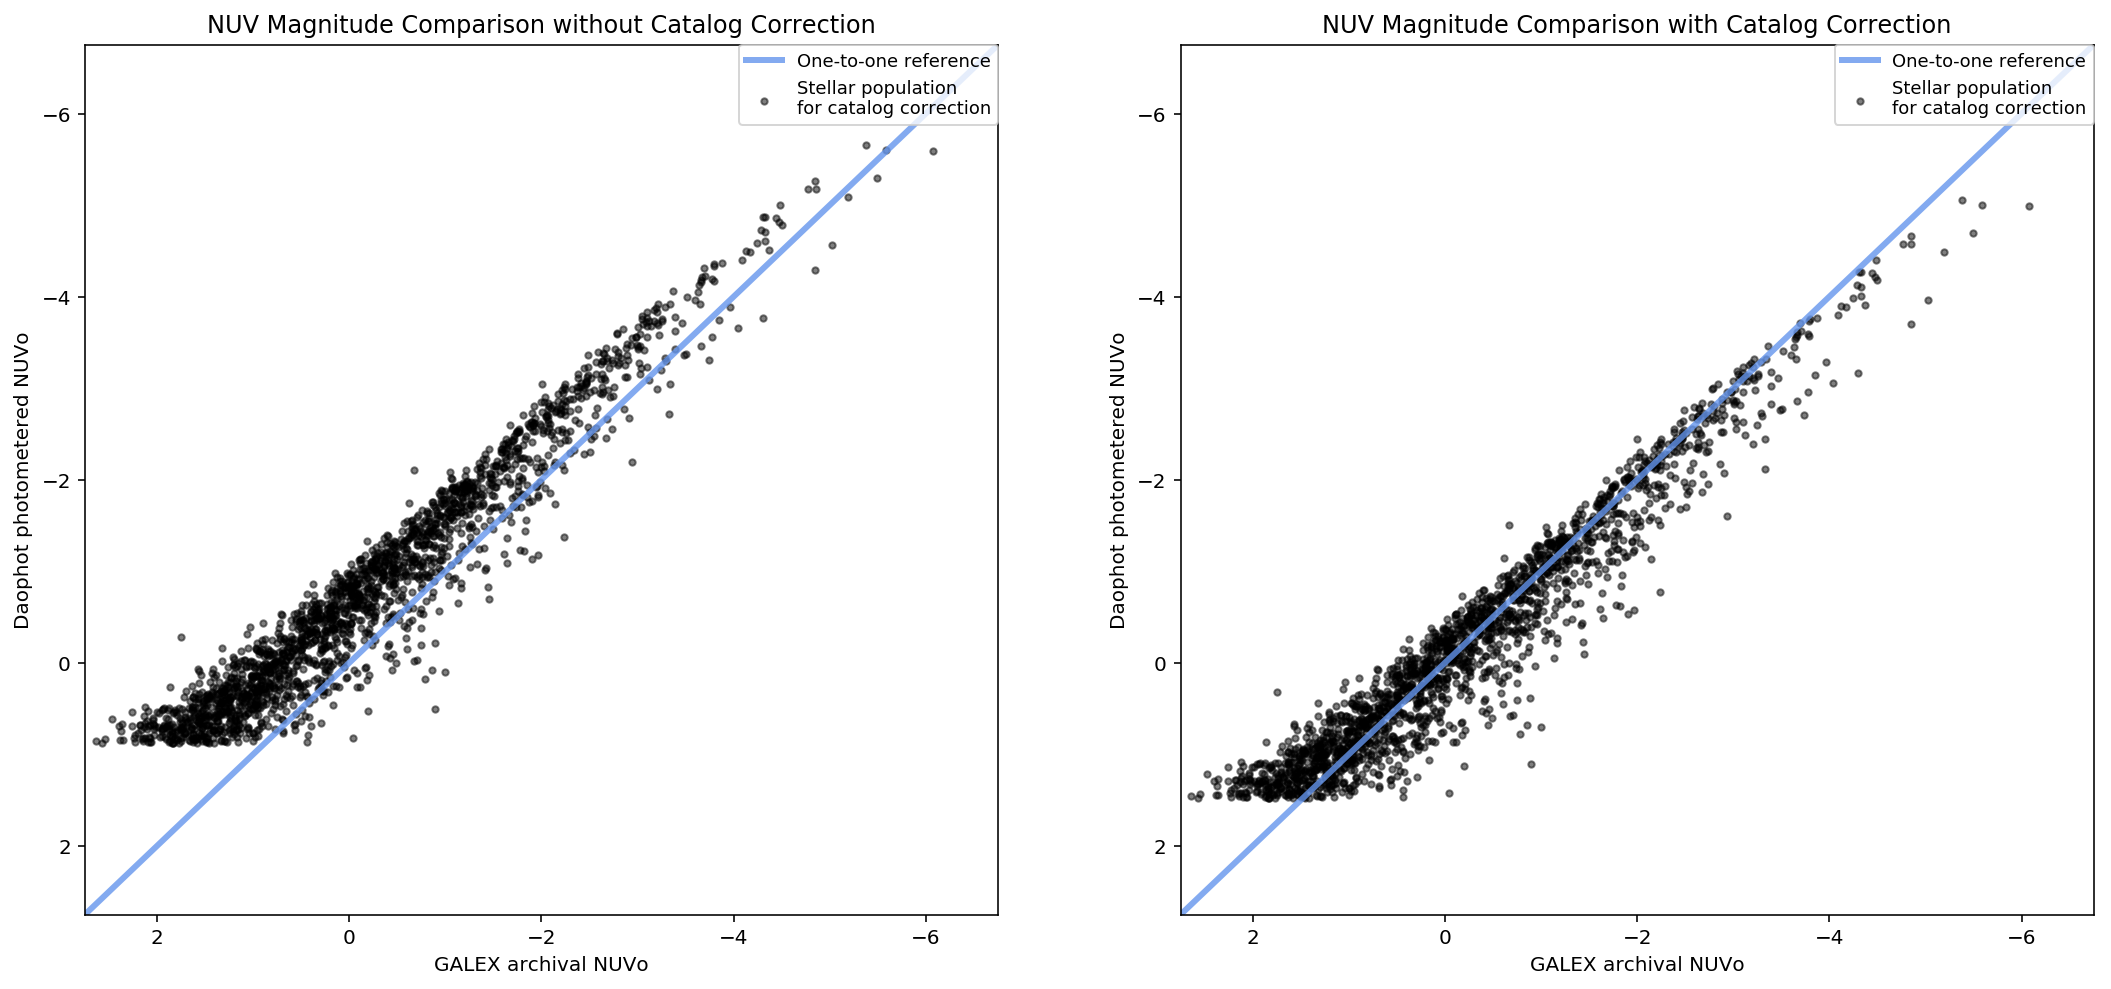

In [178]:
# Plotting
ys = [photometered_nuv, photometered_nuv + 0.6]
titles = ['NUV Magnitude Comparison without Catalog Correction', \
          'NUV Magnitude Comparison with Catalog Correction']

plt.figure(figsize=(18, 8))

a,b = 1,2
start, end = 2.75, -6.75

for i in range(2):
    plt.subplot(a,b,i+1)
    
    x = galex_nuv
    y = ys[i]
    
    # slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    # fit = x * slope + intercept
    
    plt.scatter(x, y, color='black', label='Stellar population \nfor catalog correction', \
                s=10, marker="o", alpha=0.5)
    plt.plot([end,start],[end,start], linewidth=3, color='cornflowerblue', alpha=0.8, \
             label="One-to-one reference")
    # plt.plot(x, fit)
    
    smc.plt_parameters(titles[i], 'GALEX archival NUVo', 'Daophot photometered NUVo', start, end, \
                       start, end, True)

plt.show()